#### This notebook is used to visualise and compare the results of the experiments conducted in this paper. This notebook specifically illustrates the said results for the credibility threshold of 0.01. 

The results are stored in the 'results' folder. We had parallelized the process of running the experiments into batches of 4 (4900 tweets divided into 4 contiguous groups). Hence, the file names have the following nomenclature : _rev2-cold-tau_threshold-attack_typetweetIndexStart_to_tweetIndexEnd.pickle_

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter

with open('results\\rev2-cold-001-replacement0_to_1225.pickle', 'rb') as handle:
    replacement0_to_1225_001 = pickle.load(handle)
with open('results\\rev2-cold-001-default0_to_1225.pickle', 'rb') as handle:
    default0_to_1225_001 = pickle.load(handle)
with open('results\\rev2-cold-001-insertion0_to_1225.pickle', 'rb') as handle:
    insertion0_to_1225_001 = pickle.load(handle)

with open('results\\rev2-cold-001-replacement1225_to_2450.pickle', 'rb') as handle:
    replacement1225_to_2450_001 = pickle.load(handle)
with open('results\\rev2-cold-001-default1225_to_2450.pickle', 'rb') as handle:
    default1225_to_2450_001 = pickle.load(handle)
with open('results\\rev2-cold-001-insertion1225_to_2450.pickle', 'rb') as handle:
    insertion1225_to_2450_001 = pickle.load(handle)
    
with open('results\\rev2-cold-001-replacement2450_to_3675.pickle', 'rb') as handle:
    replacement2450_to_3675_001 = pickle.load(handle)
with open('results\\rev2-cold-001-default2450_to_3675.pickle', 'rb') as handle:
    default2450_to_3675_001 = pickle.load(handle)
with open('results\\rev2-cold-001-insertion2450_to_3675.pickle', 'rb') as handle:
    insertion2450_to_3675_001 = pickle.load(handle)
    
with open('results\\rev2-cold-001-replacement3675_to_4900.pickle', 'rb') as handle:
    replacement3675_to_4900_001 = pickle.load(handle)
with open('results\\rev2-cold-001-default3675_to_4900.pickle', 'rb') as handle:
    default3675_to_4900_001 = pickle.load(handle)
with open('results\\rev2-cold-001-insertion3675_to_4900.pickle', 'rb') as handle:
    insertion3675_to_4900_001 = pickle.load(handle)

In [2]:
default_lst = [default0_to_1225_001,default1225_to_2450_001,default2450_to_3675_001,default3675_to_4900_001]
default = set().union(*default_lst)
print(len(default))

51


We combine the 4 dictionaries of the insertion attack type results into 1 dictionary and visualize the result. 

In [3]:
insertion = {**insertion0_to_1225_001,**insertion1225_to_2450_001,**insertion2450_to_3675_001,**insertion3675_to_4900_001}

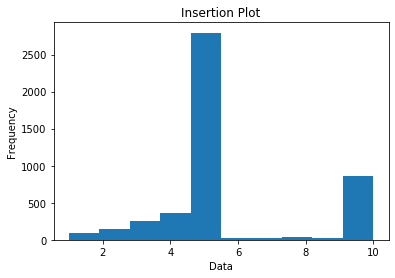

Counter({5: 2794, 10: 863, 4: 366, 3: 252, 2: 149, 1: 85, 8: 41, 7: 29, 6: 26, 9: 18})
4623


In [4]:
plt.hist([val for val in insertion.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Insertion Plot')
plt.show()

counter1 = Counter(insertion.values())
print(counter1)
print(sum(counter1.values()))

(0, 4000)

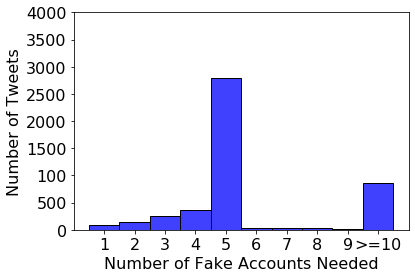

In [5]:
import seaborn as sns
hist = sns.histplot(data=[val for val in insertion.values()],bins=10,color='blue',discrete=True)
hist.set_xlabel("Number of Fake Accounts Needed",fontsize=16)
hist.set_ylabel("Number of Tweets",fontsize=16)
hist.tick_params(labelsize=16)
hist.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000]) # <--- set the ticks first
hist.set_yticklabels([0,500,100,1500,2000,2500,3000,3500,4000])
hist.set_xticks([1,2,3,4,5,6,7,8,9,10]) # <--- set the ticks first
hist.set_xticklabels([1,2,3,4,5,6,7,8,9,">=10"])
plt.ylim(0,4000)


We combine the 4 dictionaries of the replacement attack type results into 1 dictionary and visualize the result. 

In [6]:
replacement = {**replacement0_to_1225_001,**replacement1225_to_2450_001,**replacement2450_to_3675_001,**replacement3675_to_4900_001}

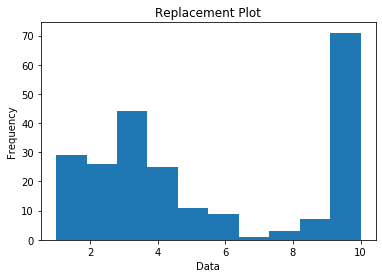

Counter({10: 71, 3: 44, 1: 29, 2: 26, 4: 25, 5: 11, 6: 9, 9: 7, 8: 3, 7: 1})
226


In [7]:
plt.hist([val for val in replacement.values()],bins=10)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Data');
plt.title('Replacement Plot')
plt.show()

counter2 = Counter(replacement.values())
print(counter2)
print(sum(counter2.values()))

(0, 75)

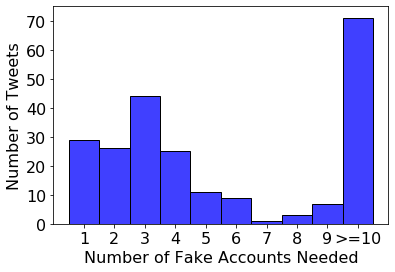

In [8]:
import seaborn as sns
sns.color_palette("tab10")
hist = sns.histplot(data=[val for val in replacement.values()],bins=10,color='blue',discrete=True)
hist.set_xlabel("Number of Fake Accounts Needed",fontsize=16)
hist.set_ylabel("Number of Tweets",fontsize=16)
hist.tick_params(labelsize=16)
hist.set_yticks([0,10,20,30,40,50,60,70]) # <--- set the ticks first
hist.set_yticklabels([0,10,20,30,40,50,60,70])
hist.set_xticks([1,2,3,4,5,6,7,8,9,10]) # <--- set the ticks first
hist.set_xticklabels([1,2,3,4,5,6,7,8,9,'>=10'])
plt.ylim(0,75)


We similarly load results for the birdwatch data and visualise it. The results for the birdwatch data are obtained by running the birdwatch-metric-process-tweets.py script. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import random,string
import math
from collections import Counter
from scipy import stats
from collections import defaultdict
        
with open('results/bw-insertion.pickle', 'rb') as handle:
    insertion_bw = pickle.load(handle)
with open('results/bw-replacement.pickle', 'rb') as handle:
    replacement_bw = pickle.load(handle)
with open('results/bw-default.pickle', 'rb') as handle:
    default_bw = pickle.load(handle)    

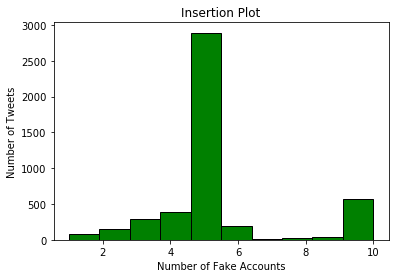

Counter({5: 2891, 10: 574, 4: 391, 3: 287, 6: 197, 2: 153, 1: 84, 9: 44, 8: 21, 7: 15})
4657


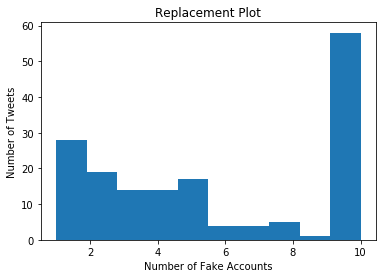

Counter({10: 58, 1: 28, 2: 19, 5: 17, 4: 14, 3: 14, 8: 5, 7: 4, 6: 4, 9: 1})
164


In [14]:
plt.hist([val for val in insertion_bw.values()],bins=10,ec='black',color='green')  # density=False would make counts
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Fake Accounts')
plt.title('Insertion Plot')
plt.show()

counter1 = Counter(insertion_bw.values())
print(counter1)
print(sum(counter1.values()))

plt.hist([val for val in replacement_bw.values()],bins=10)  # density=False would make counts
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Fake Accounts')
plt.title('Replacement Plot')
plt.show()

counter2 = Counter(replacement_bw.values())
print(counter2)
print(sum(counter2.values()))

Text(0.5, 0, 'Number of Fake Accounts')

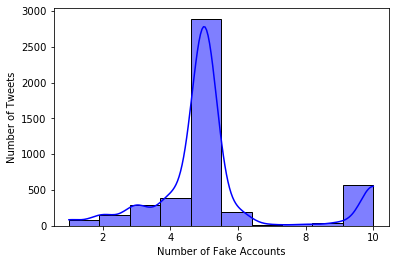

In [15]:
import seaborn as sns
sns.histplot(data=[val for val in insertion_bw.values()],bins=10,color='blue',kde=True)
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Fake Accounts')

Text(0.5, 0, 'Number of Fake Accounts')

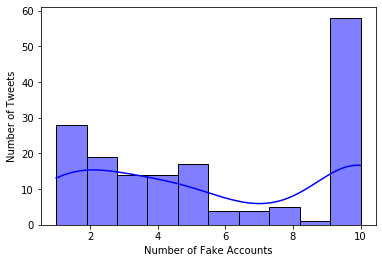

In [16]:
import seaborn as sns
sns.histplot(data=[val for val in replacement_bw.values()],bins=10,color='blue',kde=True)
plt.ylabel('Number of Tweets')
plt.xlabel('Number of Fake Accounts')

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


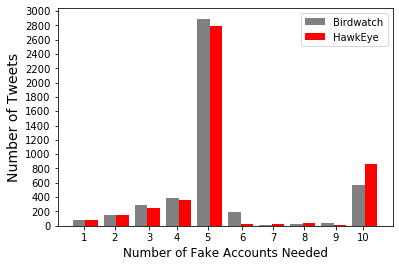

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = [val for val in insertion_bw.values()]
y = [val for val in insertion.values()]
bins = np.linspace(0,10,10)

fig, ax1 = plt.subplots()
ax1.hist([x, y], color=['gray','red'],label=['Birdwatch', 'HawkEye'])
ax1.set_xlabel("Number of Fake Accounts Needed",fontsize=12)
ax1.set_ylabel("Number of Tweets",fontsize=14)
plt.legend(loc='upper right')
plt.xticks([1.4,2.3,3.3,4.1,5,6,6.9,7.8,8.7,9.5],[1,2,3,4,5,6,7,8,9,10])
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=20)
plt.show()

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


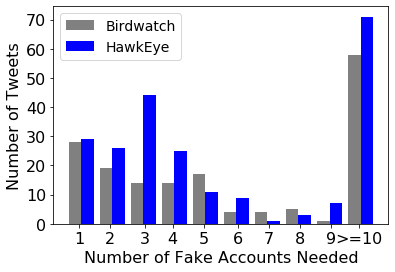

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = [val for val in replacement_bw.values()]
y = [val for val in replacement.values()]
bins = np.linspace(0,10,10)

fig, ax1 = plt.subplots()
ax1.hist([x, y], color=['gray','blue'],label=['Birdwatch', 'HawkEye'])
ax1.set_xlabel("Number of Fake Accounts Needed",fontsize=16)
ax1.set_ylabel("Number of Tweets",fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.xticks([1.4,2.3,3.3,4.1,5,6,6.9,7.8,8.7,9.5],[1,2,3,4,5,6,7,8,9,">=10"])
plt.xticks(fontsize=16)
hist.set_yticks([10,20,30,40,50,60,70]) # <--- set the ticks first
hist.set_yticklabels([10,20,30,40,50,60,70])
plt.yticks(fontsize=16)
plt.locator_params(axis="x", nbins=10)
plt.show()

We perform a two tailed t-test to compare the birdwatch and hawkeye results. 

In [19]:
insertion_common_keys = list(insertion.keys() & insertion_bw.keys())
replacement_common_keys = list(replacement.keys() & replacement_bw.keys())
insertion_bw_analysis = [insertion_bw[key] for key in insertion_common_keys]
insertion_rev2_analysis = [insertion[key] for key in insertion_common_keys]
replacement_bw_analysis = [replacement_bw[key] for key in replacement_common_keys]
replacement_rev2_analysis = [replacement[key] for key in replacement_common_keys]

print(stats.ttest_rel(insertion_rev2_analysis,insertion_bw_analysis,alternative='greater'))
print(stats.ttest_rel(replacement_rev2_analysis,replacement_bw_analysis,alternative='greater'))

Ttest_relResult(statistic=8.517906840744848, pvalue=1.089809904801176e-17)
Ttest_relResult(statistic=-1.9697500434420636, pvalue=0.9746517050982485)
